# Plot footprints for TF pair locations

## Calculate TF positions from motifs

We calculate the location of TFBS by scanning the genome for motif positions, and run market basket analysis to find co-occurring TFs:

In [1]:
import tfcomb
C = tfcomb.CombObj()
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4_masked.fa.gz", 
                   resolve_overlapping="highest_score",
                   motif_pvalue=5e-05,
                   threads=4)

/workspace/.conda/tfcomb_env/lib/python3.7/site-packages/tfcomb/network.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


INFO: Scanning for TFBS with 4 thread(s)...
INFO: Progress: 11%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 50%
INFO: Progress: 60%
INFO: Progress: 70%
INFO: Progress: 80%
INFO: Progress: 90%
INFO: Finished!
INFO: Processing scanned TFBS
INFO: Identified 336722 TFBS (401 unique names) within given regions


In [2]:
C.count_within(threads=4)
C.market_basket()
C.simplify_rules()

INFO: Setting up binding sites for counting
INFO: Counting co-occurrences within sites
INFO: Counting co-occurrence within background
INFO: Progress: 10%
INFO: Progress: 20%
INFO: Progress: 30%
INFO: Progress: 40%
INFO: Progress: 52%
INFO: Progress: 62%
INFO: Progress: 72%
INFO: Progress: 80%
INFO: Progress: 92%
INFO: Finished!
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs
INFO: Market basket analysis is done! Results are found in <CombObj>.rules


In [3]:
C.rules.head(10)

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,3323,2877,3415,1.060144,91.794181
SP2-SP3,SP2,SP3,3191,3415,2891,1.015564,93.100144
SP1-SP3,SP1,SP3,2640,2877,2891,0.915398,99.371057
PATZ1-SP2,PATZ1,SP2,2776,3237,3415,0.834935,76.407190
KLF3-SP2,KLF3,SP2,2254,2155,3415,0.830874,95.606695
SP2-WT1,SP2,WT1,2666,3415,3163,0.811176,65.990438
KLF6-SP2,KLF6,SP2,2375,2557,3415,0.803717,84.420823
SP2-THAP1,SP2,THAP1,1779,3415,1444,0.801119,78.441254
SP2-SP4,SP2,SP4,2247,3415,2431,0.779857,88.228572
KLF3-SP3,KLF3,SP3,1910,2155,2891,0.765219,75.631093


## Obtain locations of pairs 

In [4]:
pairs = C.get_pair_locations(("CTCF","SP2"))

In [5]:
len(pairs)

547

## Plot pair footprints

In [6]:
# mandatory setup for plotting (except pairLines)
pairs.bigwig_path = "../data/GM12878_corrected.bw"

# optional
# globally set signal windows size counted from alignment point
# pairs.comp_plotting_tables(flank=(10, 150), # default = 100
#                            align="left") # one of ['center', 'left', 'right']

##### PairMap
A heatmap of all binding pairs sorted by distance between the transcription factors.

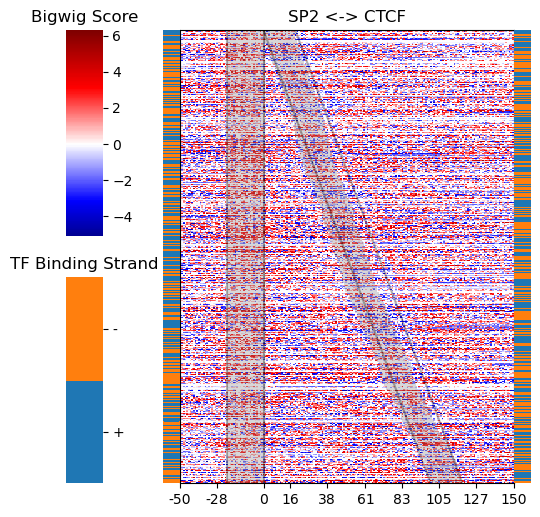

GridSpec(1, 2, width_ratios=[1, 10])

In [7]:
import numpy as np

pairs.pairMap(logNorm_cbar=None, # One of [None, "centerLogNorm", "SymLogNorm"]. Select type of colorbar normalization.
              show_binding=True, # Show the TF binding positions.
              flank_plot="strand", # One of ["strand", "orientation"]. Select what is shown in the flanking plots.
              figsize=(6, 6), # Figure size
              output=None, # Path to output file.
              flank=(50, 150), # Number of bases extended from center. Default = 100 or last used size
              align="left", # Pair alignment one of ["center", "left", "right"]. Default = "center" or last used.
              alpha=0.3, # Alpha for center line, TF binding positions and diagonal lines
              cmap="seismic", # Color palette to use
              show_diagonal=True, # Show diagonal binding lines
              legend_name_score="Bigwig Score", # Set name of scoring legend (upper left)
              xtick_num=10, # Number of shown x-axis ticks
              log=np.log1p, # Log function to apply on the scores (any provided by numpy). Default np.log1p
              dpi=100) # Dots per inch

##### PairTrack
Aggregated binding of selected positions. Either select by one or more distances (between TFs) to aggregate signal or select a range of binding positions sorted by increasing distance.

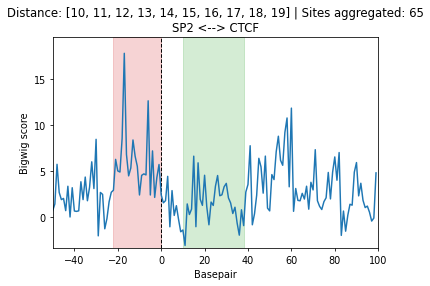

<AxesSubplot:title={'center':'Distance: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19] | Sites aggregated: 65\nSP2 <--> CTCF'}, xlabel='Basepair', ylabel='Bigwig score'>

In [8]:
pairs.pairTrack(# either
                dist=list(range(10,20)), # Select sites to aggregate by one or more distances between TF-pair.
                # or
                # (range will be used if both are set)
                start=None, # Start of site range to be aggregated.
                end=None, # End of site range to be aggregated. Sites are sorted by increasing distance.

                ymin=None, # y-axis minimum. Default is min value of selected data.
                ymax=None, # y-axis maximum. Default is max value of selected data.
                ylabel="Bigwig score", # y-axis label
                output=None, # Path to output file.
                flank=(50, 100), # Number of bases extended from center. Default = 100 or last used size
                align="left", # Pair alignment one of ["center", "left", "right"]. Default = "center" or last used.
                dpi=70, # Dots per inch
                figsize=(6, 4)) # Figure size

##### PairTrackAnimation
Multiple pairTracks combined as to a gif.  
  
**Note:**  
The memory limit can be increased with the following if necessary. Default is 20 MB.  
``matplotlib.rcParams['animation.embed_limit'] = 100 # in MB``

In [9]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 100

In [10]:
pairs.pairTrackAnimation(site_num=None, # Number of sites aggregated in each plot. If None will aggregate by distance.
                         step=10, # Step size between plots. Ignored if site_num=None
                         ymin=None, # y-axis minimum. Default is min value of selected data.
                         ymax=None, # y-axis maximum. Default is max value of selected data.
                         ylabel="Bigwig score", # y-axis label
                         interval=50, # Time between plots in milliseconds.
                         repeat_delay=0, # Delay until the gif is repeated in milliseconds. Not functional
                         repeat=True, # Whether the gif should be repeated. Only affects jupyter.
                         output=None, # Path to output file.
                         flank=(50, 150), # Number of bases extended from center. Default = 100 or last used size
                         align="left", # Pair alignment one of ["center", "left", "right"]. Default = "center" or last used.
                         dpi=70, # Dots per inch
                         figsize=(6, 4)) # Figure size

Render animation: 100%|██████████| 102/102 [00:06<00:00, 15.18it/s]


##### PairLines
Compare TF pair in lineplot. Choose from various options for x- and y-axis. To view x & y options set parameter to `None`

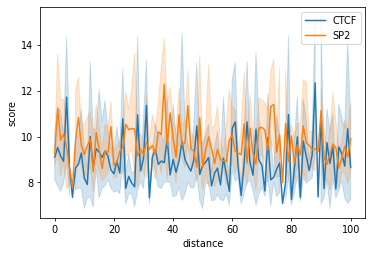

<AxesSubplot:xlabel='distance', ylabel='score'>

In [11]:
pairs.pairLines(x="distance", # X-axis values
                y="score", # Y-axis values
                figsize=(6, 4), # Figure size
                dpi=70, # Dots per inch
                output=None) # Path to output file.